# Determining Language Differences Between Interest Groups
**Aditi Vinod & Luke Witten**

## Introduction: []

### Primary Questions
What terms are unique to internet sub-communities, like gamers? \
Based on social media content or messages sent, can an individual be associated with a specific internet sub-community?

### Background Information
Due to the ease of access to the internent, people have been able to find and interact with niche groups that share similar interests to themselves online. Similar to how dialects and accents have formed based on regions in the past, various new words and phrases, exclusive to individual communities, have popped up in sectors of the internet. 

One example of a popular community with a large online presence is gamers. Especially following the recent 2020 COVID-19 pandemic, there has been a significant increase in the past few years in the number of individuals who spend time playing games - both individually and in teams - online. Through content creators (on Twitch, YouTube, TikTok, etc.), online forums, and memes, the English-speaking gaming community likely has one of the most developed subsets of the language to exist; there are a significant number of terms, like "pog," "gg," and "smurf" that have either no significance or mean something different to non-gaming members of society. 

Being able to identify these differences in language helps []

In order to create a list of "gamer words," or terms that are unique to gamers online, and determine whether an individual is a gamer, several steps must be taken: \
1-Collect data that reflects usage of langauge online in "gamer" communities and "normally" \
2-Compare the two data sets in order to create a list of "gamer words" that did not include unaviodable common words in the English language \
3-Collect data for individual users representing their usage of language \
4-Use the "gamer words" list and the individuals' usage of said gamer words to determine whether they are a gamer or not



1-What is the question you are trying to answer or the story that you are trying you tell?
2-Why is this question or story important?
3-What were the main steps your project made towards answering the question or telling the story?

### Prerequisite Code
The following cell ensures that the necessary functions are imported into the document and that the notebook uses the latest version of all code in the library:

In [40]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud

from scrape_data import *
from gamer_words import *
from visualize_data import *

import csv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Methodology

### Data Collection
The data that was collected in order to determine "gamer" and "normal" usage of language on the internet was pulled from Reddit. Reddit was chosen because it is a platform that is used by a significant amount of people on the internet accross hundreds of sub-communities. 

1-Where did you get your data from?
2-How did you get this data (i.e., did you programmatically download it or did you access it through an API)?
3-How did you store and/or process this data (e.g., did you store and process it in Pandas)?
4-What information did you get from this data that you used in the presentation of your results?

Now that we have our data (conveniently stored as CSV's) we can actually start analyzing our data.

Storing our data in this form means that we do not need to re-scrape the data from Reddit every time we want to analyze it, but it also means that the data is not readily accessible by the computer.

Luckily reading data from a CSV is not difficult, using the function `csv_to_dict` we can easily convert from a CSV file to a dictionary in python.

In [41]:
gamer_dictionary = csv_to_dict("gaming.csv")
for word in gamer_dictionary:
    value = gamer_dictionary[word]
    gamer_dictionary[word] = int(value)


print(f"The length of the dictionary is {len(gamer_dictionary)}")

The length of the dictionary is 17741


We now have access to a dictionary that tells us how many times a word is used in the dataset we collected, but many of these words appear only once or are typos. These results are not particularly useful as we want words that are commonly used by gamers.

We can remove words from the dataset who do not show up enough times fairly simply using `remove_too_uncommon()`. 

In [42]:
# Create a new dictionary with only words that appear 3 or more times
gamer_dictionary_1 = remove_too_uncommon(gamer_dictionary.copy(),3)
print(f"The length of the dictionary is {len(gamer_dictionary_1)}.")

The length of the dictionary is 5056.


This dataset is much smaller than the original and likely more representative of words that gamers actually say. 

If we want to find out which words gamers use most, then all we need to do is find which words appear most frequently in the dataset. Once we have these "gamer words" we can compare them against a user's post history to find out if they are a gamer or not.

Let's run `find_most_frequent()` to find the 5 most frequently occuring "gamer words"

In [43]:
gamer_dictionary_2 = find_most_frequent(gamer_dictionary_1.copy(),5)
print(f"The five most frequent gamer words are {gamer_dictionary_2}.")

The five most frequent gamer words are {'the': 6782, 'to': 4346, 'and': 3521, 'a': 3467, 'of': 3003}.


Looking at the words that appeared we can see that something is obviously wrong. While there is no doubt that gamers use words like "a", "and", and "the" frequently, nobody would be fooled into believing that these words are unique to the gamer vocabulary. 

To fully determine what words are unique to the gamer vocabulary, we will need to somehow compare the language dataset from gamers to a language dataset for non-gamers.

For our convenience, this data has already been scraped and is stored in `normal_dictionary.csv`

~ aditi put something here about our methodology from scraping normal subreddits and what normal subreddits we scraped from~

To filter out words from both dictionaries we can go through each word in the gamer dictionary and compare how frequently a word occurrs in both dictionaries. If a word is used too similarly in both language sets then we can remove the word from both. 

Unfortunately, our dictionary currently stores the number of times a word has been used in a language set and not the percentage of times that a word is used in the entire language set. This is a simple enough thing to code though, and now exists in the form of the `instances_to_decimal` function.

In [44]:
# Create and store the normal dictionary
normal_dictionary = csv_to_dict("normal.csv")
for word in normal_dictionary:
    value = normal_dictionary[word]
    normal_dictionary[word] = int(value)

# Remove infrequent words
normal_dictionary_1 = remove_too_uncommon(normal_dictionary.copy(),3)

gamer_decimal_dictionary = instances_to_decimal(gamer_dictionary_1.copy())
normal_decimal_dictionary = instances_to_decimal(normal_dictionary_1.copy())

the_usages = gamer_dictionary_1["the"]
the_decimal = gamer_decimal_dictionary["the"]
print(f"\"the\" is used {the_usages} times in the gamer dictionary.")
print(f"\"the\" is used {the_decimal} of the time in the gamer language set.")

"the" is used 6782 times in the gamer dictionary.
"the" is used 0.0482409343746888 of the time in the gamer language set.


Now that we have our data in a usable form, we can parse through our two language sets and remove words that appear a similar percentage of the time in both data sets. While the actual percentage value that is used for this process is arbitrary, we found that removing words with frequency values within +- 15% of each other worked well to find a good set of words.

We can use the function `remove_most_common()` to parse our two dictionaries with respect to each other and even output a list of words that were removed from both sets.

In [45]:
normal_decimal_dictionary_1, gamer_decimal_dictionary_1, ignore_list = remove_most_common(normal_decimal_dictionary.copy(),gamer_decimal_dictionary.copy())
print(f"The length of the dictionary is {len(gamer_decimal_dictionary_1)}.")

The length of the dictionary is 4325.


While we now have two curated language sets, one for the gamer language set and one for the normal language set, we still do not have a method for determining what words are extremely specific to the gamer lexicon. 

To do this, we can examine all words that appear in both the gamer and the normal dataset, if the word is used 5 times more frequently in the gamer language set than the normal language set, then we can determine it is a gamer word. While this 5x threshold is undoubtedly arbitrary, in testing we found that this value produced a good number of gamer words that were not too over specific, but also not too common as to not be considered gamer specific.

Sometimes possible gamer words do not appear at all in the normal language set, so there needs to be a method for these words to become gamer words as well. We foudn that in testing, if a word does not appear in both data sets and its frequency of occurrences values is over .00005 then it can be reasonably considered a gamer word. While this value of .00005 is also arbitrary, we found that using it produces a solid set of gamer words.

Using our curated data sets, we can find a number of gamer words using the `determine_gamer_words()` function.

In [46]:
gamer_words_1 = determine_gamer_words(normal_decimal_dictionary_1.copy(),gamer_decimal_dictionary.copy())
print(f"There are {len(gamer_words_1)} gamer words.")

There are 650 gamer words.


In [47]:
folder_path = "anonymous_data"
pars = parse_words(normal_dictionary_1, gamer_dictionary_1, 10)
dict_test = analyze_users_language(pars[0], pars[1], pars[2], pars[3], folder_path)
stats = stats_lists(dict_test, folder_path)

## Results

### Visualization

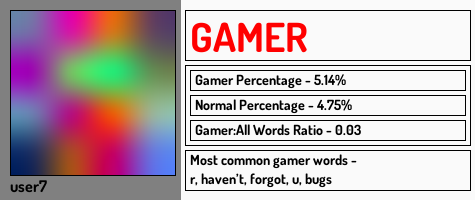

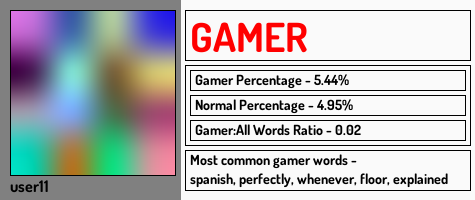

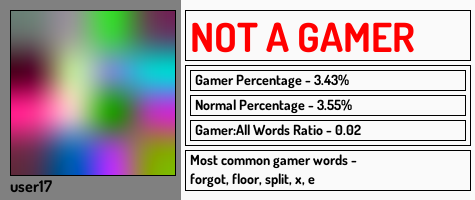

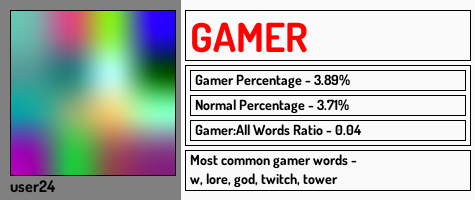

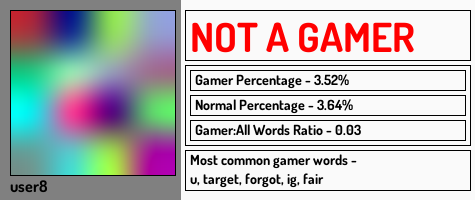

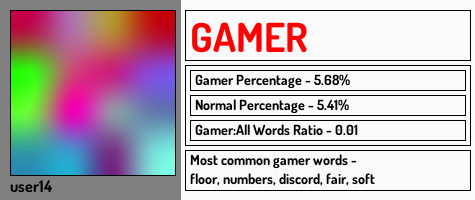

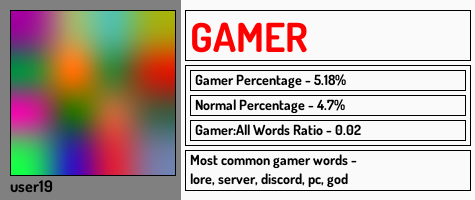

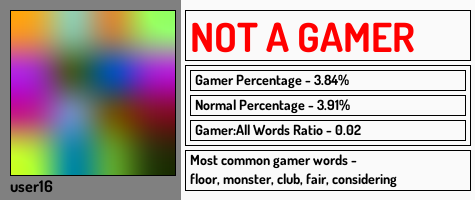

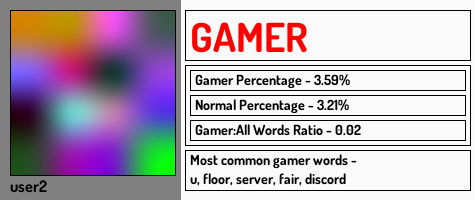

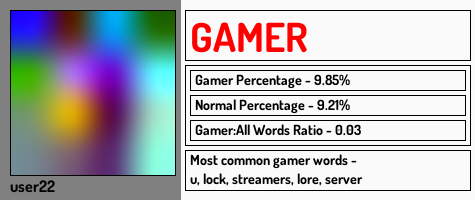

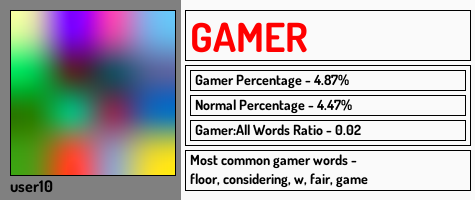

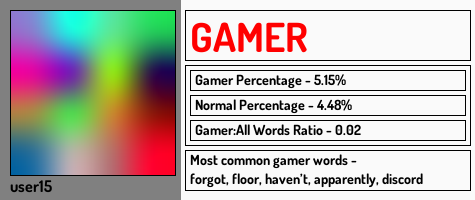

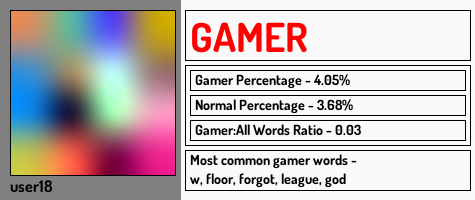

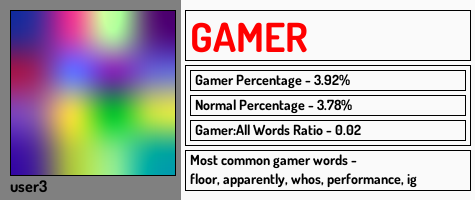

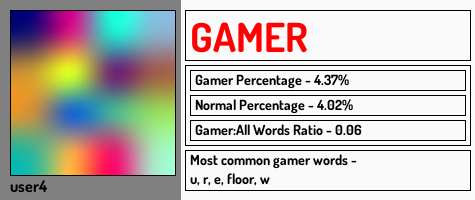

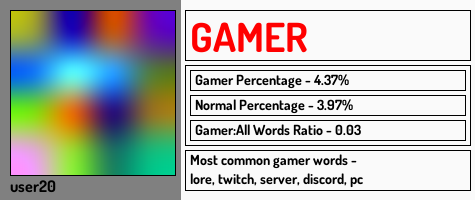

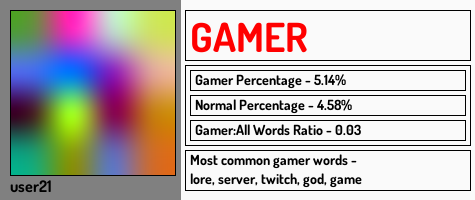

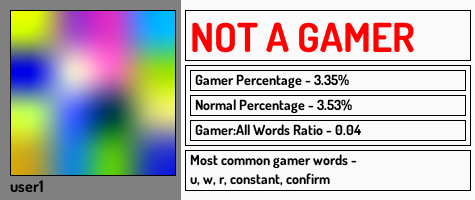

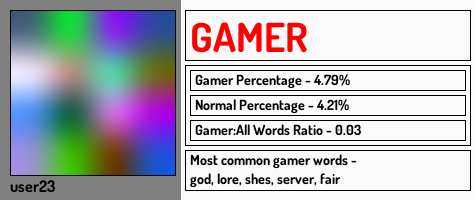

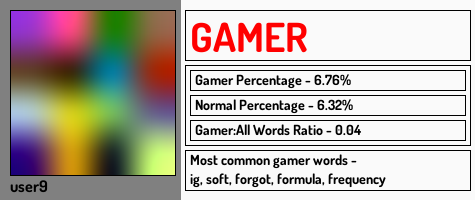

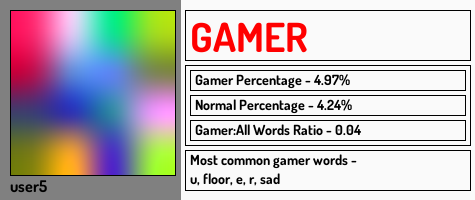

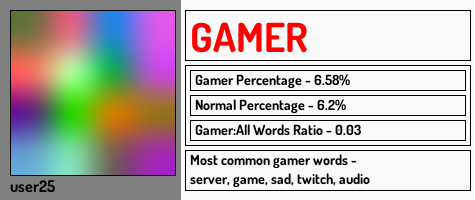

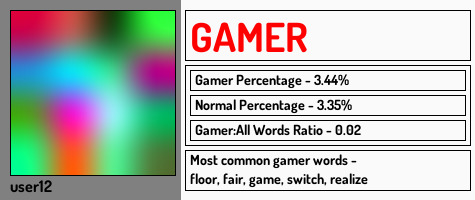

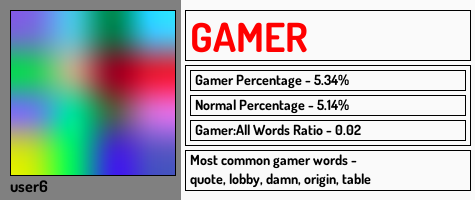

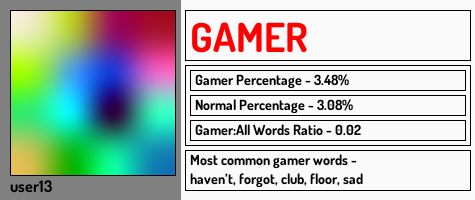

In [48]:
file_list = get_file_list(folder_path)
dict_test2 = analyze_users_language(pars[0], pars[1], pars[2], pars[3], folder_path)


user_id_dict = {}

for user in file_list:
    username = str(user)[len(str(folder_path))+1:-4]
    gamer_freq = dict_test2[user][1]
    normal_freq = dict_test2[user][0]
    gamer_status = is_gamer(gamer_freq, normal_freq)
    gamer_all_freq = dict_test2[user][2]
    top = list(find_most_frequent_gamer_words(csv_to_dict(user), pars[2], 5).keys())

    id_info = [username, gamer_status, gamer_freq, normal_freq, gamer_all_freq, top]
    user_id_dict[user] = id_info

for user in file_list:
    create_profile_image(user_id_dict[user][0], user_id_dict[user][1], user_id_dict[user][2], user_id_dict[user][3], user_id_dict[user][4], user_id_dict[user][5])

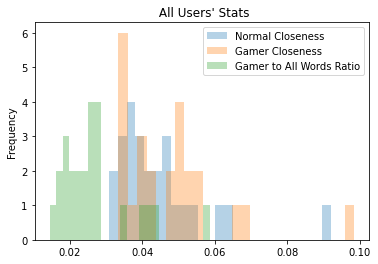

In [53]:
bins = len(stats[0])
#histogram(stats[0], bins, "Normal Closeness", "Frequency of Users' Normal Closeness")
#plt.show()
#histogram(stats[1], bins, "Gamer Closeness", "Frequency of Users' Gamer Closeness")
#plt.show()
#histogram(stats[2], bins, "Gamer to All Words Ratio", "Frequency of Gamer to All Words Ratio")
#plt.show()
stacked_histogram(stats, bins, "Normal Closeness", "Gamer Closeness", "Gamer to All Words Ratio", " All Users' Stats")

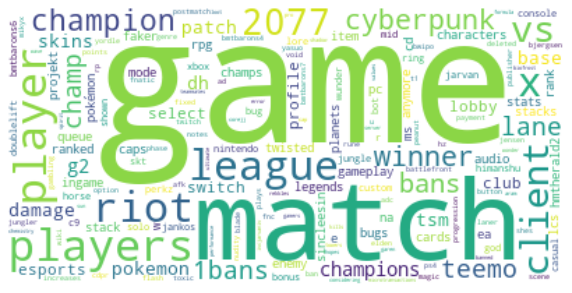

In [50]:
gamer_words_freq = Counter(determine_gamer_words_frequency(pars[0], pars[1]))
word_cloud(gamer_words_freq)

### Analysis

## Conclusion